In [1]:
import torch
from model import *

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

device = torch.device('mps')
checkpoint = torch.load('checkpoint/ckpt.pth', map_location=device)
test_data = unpickle('cifar_test_nolabels.pkl')

In [24]:
model_info = checkpoint['layers']
model = ResNet(ResidualBlock, model_info)
model.to(device)
model.load_state_dict(checkpoint['net'])

<All keys matched successfully>

In [25]:
from torchvision import transforms

norm = transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
results = {'ID': [], 'Labels': []}

images = torch.tensor(test_data[b'data']).float()
images = images.view(-1, 3, 32, 32)
images = images / 255.0

with torch.no_grad():
    images = images.to(device)
    outputs = model(images)
    _, predictions = torch.max(outputs, 1)

predictions_arr = predictions.cpu().numpy()

In [28]:
import csv

def write_csv(results):
    # Open the CSV file in write mode
    with open('results.csv', 'w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=['ID', 'Label'])
        
        # Write the header row
        writer.writeheader()
        
        # Write the data rows
        for ids_, prediction in enumerate(predictions_arr):
            writer.writerow({'ID': ids_, 'Label': prediction})

write_csv(results)

In [7]:
import matplotlib.pyplot as plt

def show_image(img):
    arrrrr = img.reshape((3, 32, 32))
    arrrrr = arrrrr.transpose(1, 2, 0)

    plt.imshow(arrrrr)
    plt.axis('off')  # Optional: Remove the axis labels
    plt.show()

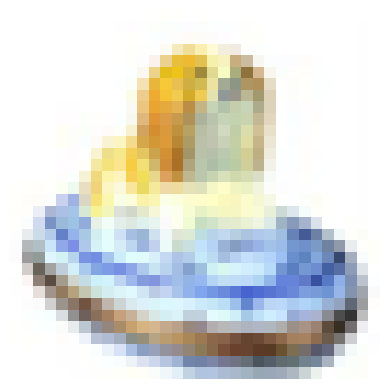

In [10]:
show_image(img)